Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
0.0 1.0
Epoch 1/10
92/92 [==============================] - 14s 146ms/step - loss: 1.3239 - accuracy: 0.4448 - val_loss: 1.1246 - val_accuracy: 0.5913
Epoch 2/10
92/92 [==============================] - 13s 137ms/step - loss: 0.9843 - accuracy: 0.6230 - val_loss: 1.0095 - val_accuracy: 0.6090
Epoch 3/10
92/92 [==============================] - 13s 137ms/step - loss: 0.8277 - accuracy: 0.6829 - val_loss: 0.9147 - val_accuracy: 0.6540
Epoch 4/10
92/92 [==============================] - 13s 138ms/step - loss: 0.6174 - accuracy: 0.7721 - val_loss: 0.9467 - val_accuracy: 0.6553
Epoch 5/10
92/92 [==============================] - 13s 139ms/step - loss: 0.4424 - accuracy: 0.8413 - val_loss: 1.0127 - val_accuracy: 0.6567
Epoch 6/10
92/92 [==============================] - 13s 145ms/step - loss: 0

<Figure size 1000x1000 with 0 Axes>

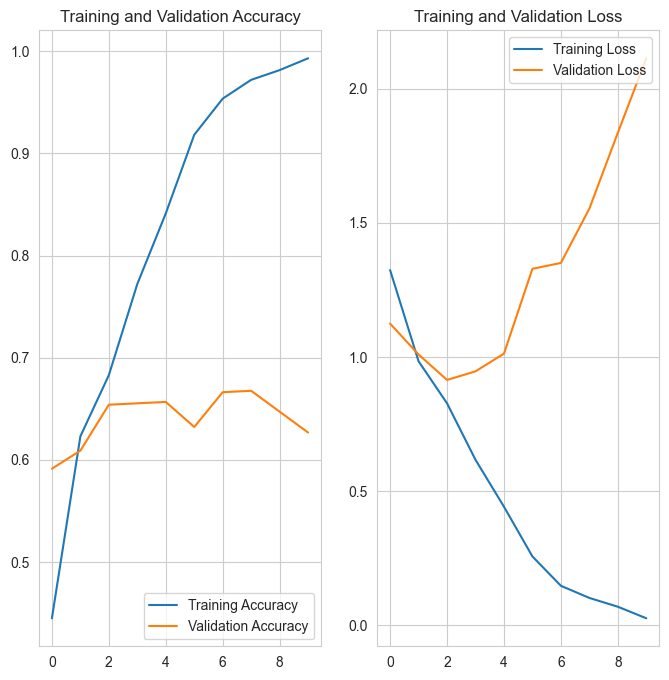

In [9]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.models import Sequential

data_dir = 'flower_photos'  

batch_size = 32
img_height = 180
img_width = 180
# 将80％的图像用于训练
train_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
# 将20％的图像用于验证
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
# 打印数据集中花朵的类别名称，字母顺序对应于目录名称
class_names = train_ds.class_names
print(class_names)
# 查看一下训练数据集中的9张图像
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")
# for image_batch, labels_batch in train_ds:
#     print(image_batch.shape)
#     print(labels_batch.shape)
#     break
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# 调用map将其应用于数据集：
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
num_classes = 5
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
#model.summary()

epochs=10
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


